In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
d=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [116]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
d.Gender=LE.fit_transform(d.Gender)


In [117]:
d.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [118]:
x1=np.array(d[["Gender"]])
x2=np.array(d[["Age"]])
x3=np.array(d[["EstimatedSalary"]])

y1=np.array(d[["Purchased"]])

In [119]:
X=np.concatenate((x1,x2,x3),axis=1)
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [120]:
d.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


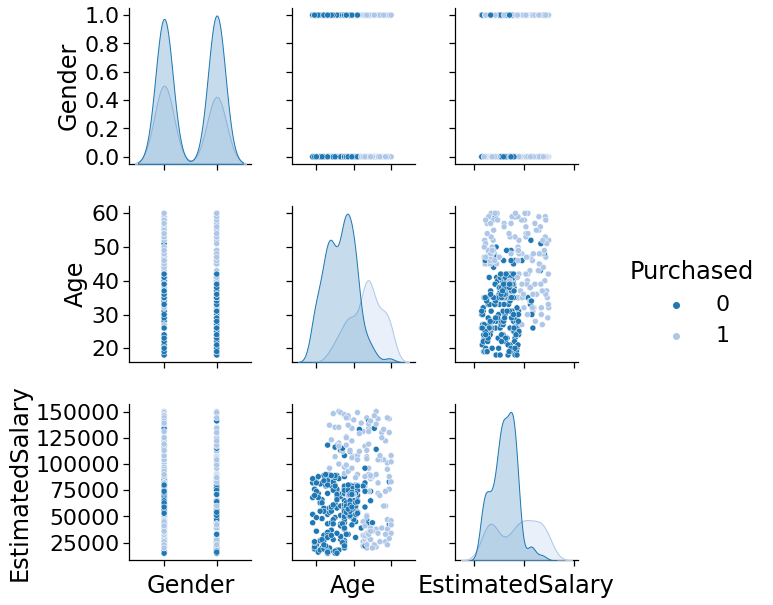

In [121]:
with sns.plotting_context("notebook",font_scale=2):

  g=sns.pairplot(d[['Gender','Age','Purchased','EstimatedSalary']],hue='Purchased',palette='tab20',size=3)
g.set(xticklabels=[])

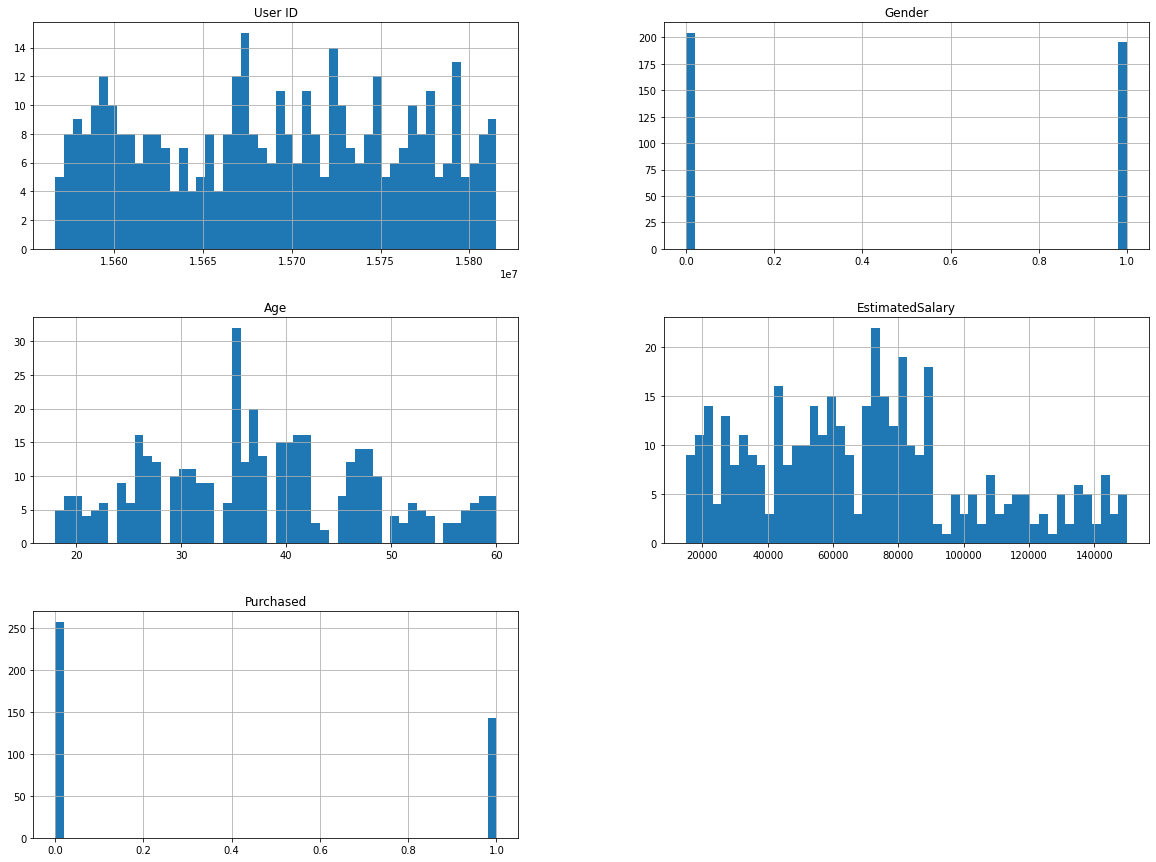

In [122]:
d.hist(bins=50,figsize=(20,15))
plt.show()

In [123]:
WIDTH  = 20
HEIGHT = 6

def plot_vs(frame, col1, col2, hue):
    plt.figure(figsize=(WIDTH, HEIGHT * 2))
    sns.scatterplot(data=frame, x=col1, y=col2, hue=hue)
    plt.title(f"Scatter plot | {col1} vs {col2}")
    plt.show()
    


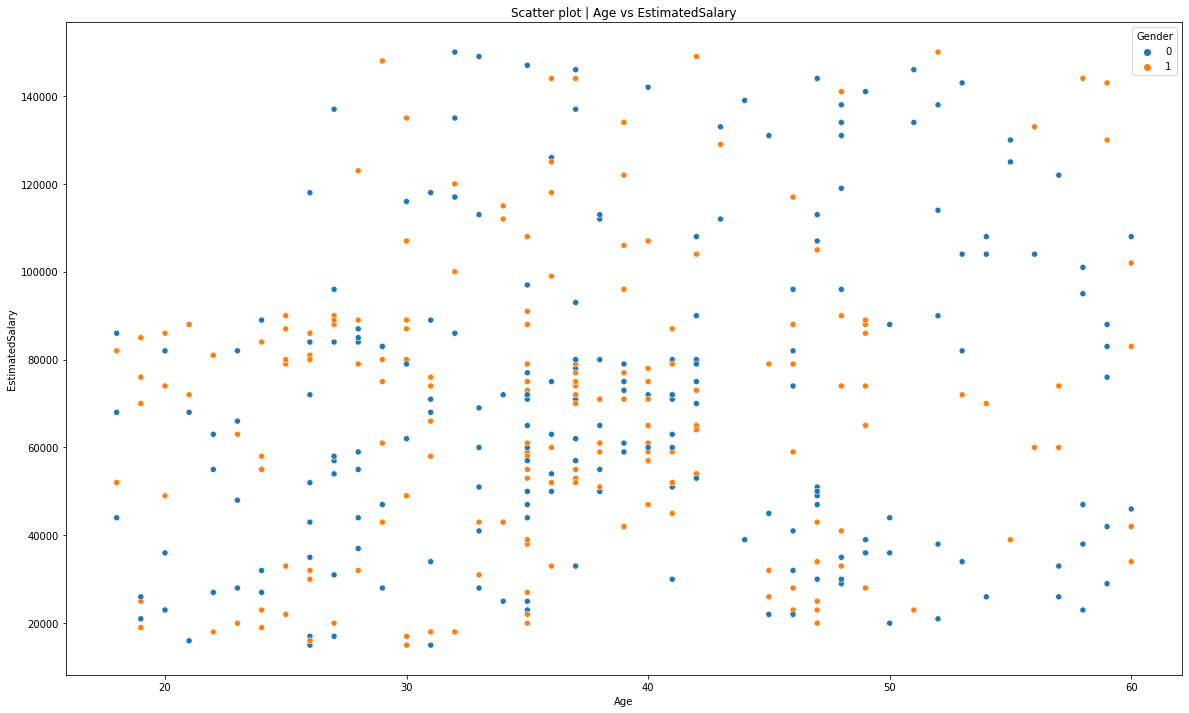

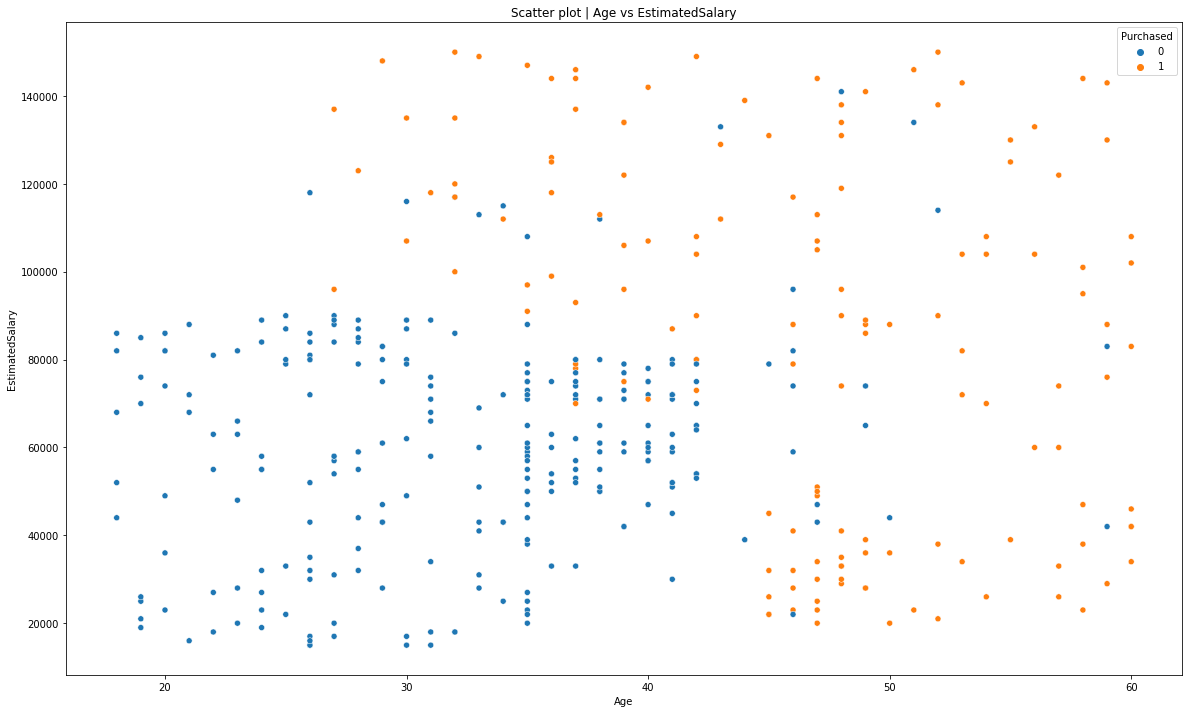

In [124]:
plot_vs(d, 'Age', 'EstimatedSalary', 'Gender')
plot_vs(d, 'Age', 'EstimatedSalary', 'Purchased')

In [132]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
data_scaled=d.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame


In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y1_train)

In [127]:
y1_pred=model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),))

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [128]:
print("training",model.score(X_train,y1_train))
print("testing",model.score(X_test,y1_test))

training 0.621875
testing 0.725


In [129]:
acc=model.score(X,y1)*100
acc  #overall accuracy

64.25